# Importing Libraries



In [2]:
# importing libararies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import missingno as msno

# Loading the data set

In [624]:
# reading the data set 
adult_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
adult_data.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


It can be seen that the headers are not included in the original dataset. therefore define columns

In [3]:
#defining col names
adult_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
adult_data.columns= ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country",">50K, <=50K"]
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# get the dimensions 

In [4]:
#get the dimensions of the data set 
adult_data.shape 

(32561, 15)

### Get information about the data type and missing values

In [5]:
#get the information about the data set 

adult_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  >50K, <=50K     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


here it can be seen that there are no any missing values in the data. we should check whether there are any missing values by checking the unique values in the data set 

### Get descriptive statistics about the data set

In [628]:
adult_data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


** The age category has a mean= 38.58, standarnd deviation of 13.64, minimum age 17, 1st quartile= 28, 3rd quartile = 48, median age 37 and maximum 90.

** The capital gain quantitative variable has an average capital gain of 1077.648844	 , standarnd deviation of 7385.292085 , minimum capital gain = 0, 1st quartile= 0, 3rd quartile = 0, median capital gain =0  and maximum 99999.0 .

** The capital loss quantitative variable has an average capital loss of 87.303830	 , standarnd deviation of 402.960219  , minimum capital loss = 0, 1st quartile= 0, 3rd quartile = 0, median capital loss =0  and maximum 4356.000000 .

for categorical variables, 
** education variable has 16 unique categories with highest occuring cateogry - Hs-graduate (occuring 10,501 times ) 

** workclass variable has 9 unique categories with highest occuring cateogry - private (occuring 22696 times ) 

** marital status variable has 7 unique categories with highest occuring cateogry - Married-civ-spouse (occuring 14976 times ) 
similarly interpretation can be done for each categorical varible


# Data Cleaning
Cleaning messy and missing data 

### checking for duplicated rows

In [6]:
adult_data.duplicated().sum()

24

The are 24 duplicated rows these should be removed 

### removing duplicated rows

In [7]:
adult_data.drop_duplicates(keep="first", inplace=True)

### Checking for shape of data

In [8]:
adult_data.shape

(32537, 15)

The number of rows has been reduced. all 24 duplicated rows has been removed 

### checking for unique values to check whether there missing values

In [9]:
# checking for unique values in workclass variable
print(adult_data['workclass'].unique())
# checking whether there are missing values 
print("no of missing values in the category :  ",adult_data["workclass"].isnull().sum())

#replace ? with np.nan
adult_data.loc[adult_data["workclass"]==' ?', "workclass"]=np.nan

#check the  total number of missing values in the workclass cateogry 
print("total no of missing values in workclass after replacing them : ", adult_data["workclass"].isnull().sum())


#total number of missing values in each col
adult_data.isnull().sum()



[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
no of missing values in the category :   0
total no of missing values in workclass after replacing them :  1836


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
>50K, <=50K          0
dtype: int64

here ' ?' is a missing value. therefore it should be renamed correctly before performing the analysis.
This method is time consuming therefore we should write a for loop to check how missing valuesare represented in the whole data set 

### To check the unique values in categorical lets run a for loop 
we dont have to check the numerical cols if missing values are represented in a different way (?) ,the datatypes would have been changed in to object when we load the data
#its not like that here. therefore no need to check. 

In [10]:

for col in adult_data.columns:
    if adult_data[col].dtype != "O":
        pass
    else:
        print(col, "unique= ", adult_data[col].unique())


workclass unique=  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
education unique=  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status unique=  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation unique=  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship unique=  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race unique=  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex unique=  [' Male' ' Female']


The ? symbol has been used as a missing value in the data set. this needs to be corrected before we are applying any missing value imputation. or else itll be recognized as a different category . 
Here we should convert all the ? symbols in to np.nan.

For it lets run a for loop 

In [11]:
#for each col in adult data replace '?' with np.nan (a way to represent mssing data)
for col in adult_data:
    adult_data[col]= adult_data[col].replace(' ?',np.nan)

print(adult_data.info())

#count the total number of Missing values in each col 
print(adult_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  >50K, <=50K     32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None
age                  0
workclass         1836
fnlwgt               0
education          

There are 1836 missing values in workclass variable, 1843 missing values in occupation variable, 583 missing values in native country variable

In [12]:
#get the percentage of total missing values in each col 
for col in adult_data.columns:
    a=adult_data[col].isnull().sum()
    b=len(adult_data[col])
    print(col, "% of missing values = ", round((a/b)*100,2),"%")
            

age % of missing values =  0.0 %
workclass % of missing values =  5.64 %
fnlwgt % of missing values =  0.0 %
education % of missing values =  0.0 %
education-num % of missing values =  0.0 %
marital-status % of missing values =  0.0 %
occupation % of missing values =  5.66 %
relationship % of missing values =  0.0 %
race % of missing values =  0.0 %
sex % of missing values =  0.0 %
capital-gain % of missing values =  0.0 %
capital-loss % of missing values =  0.0 %
hours-per-week % of missing values =  0.0 %
native-country % of missing values =  1.79 %
>50K, <=50K % of missing values =  0.0 %


only a very small percentage is missing.  we need to check if there is a pattern in the missingness 

# Plotting Missing Data

<AxesSubplot:>

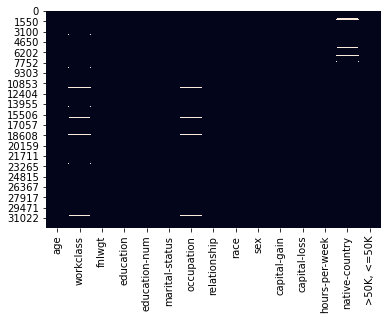

In [13]:
sns.heatmap(adult_data.isnull(), cbar=False)

From the above graph it can be seen that there is a relationship between the missingness of the two groups workclass and occupation 

<AxesSubplot:>

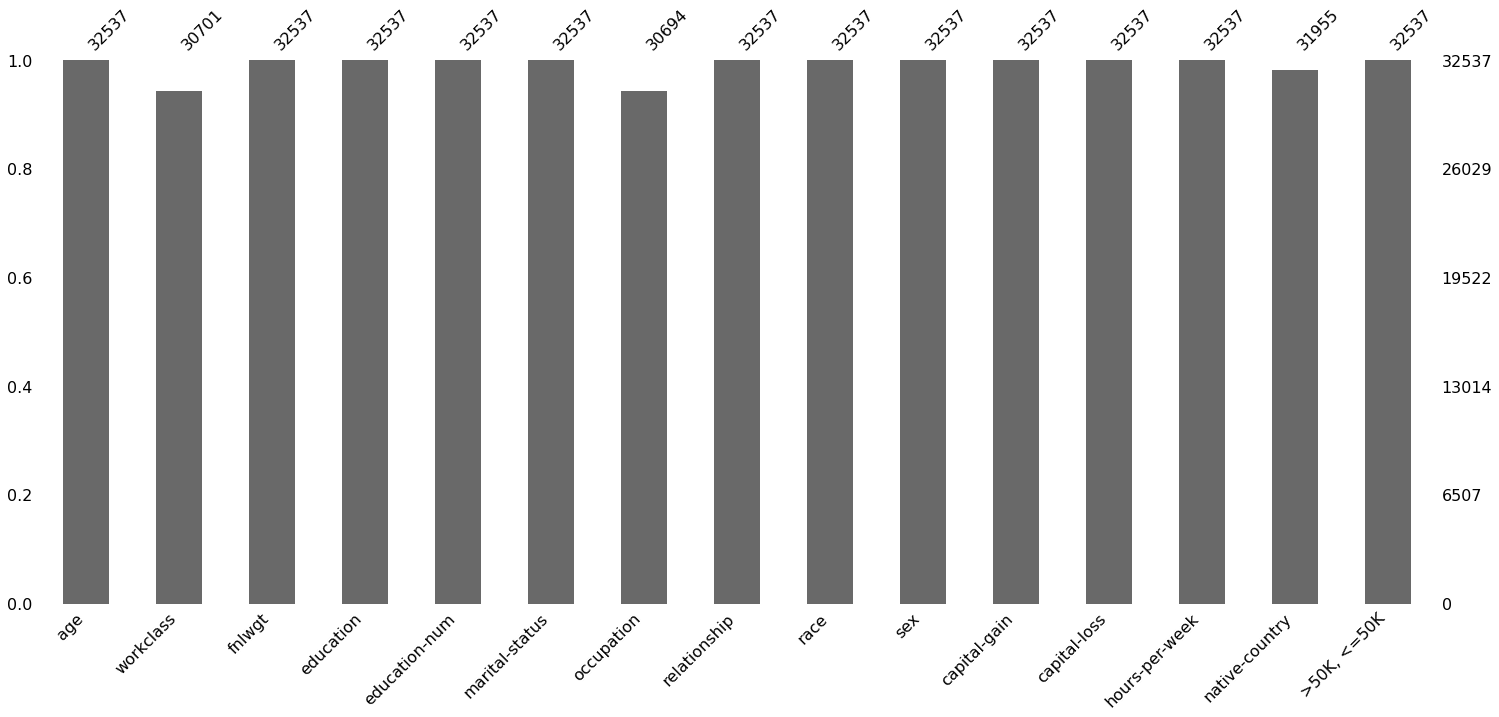

In [14]:
msno.bar(adult_data)

workclass and occupation has the largest number of missing values 

<AxesSubplot:>

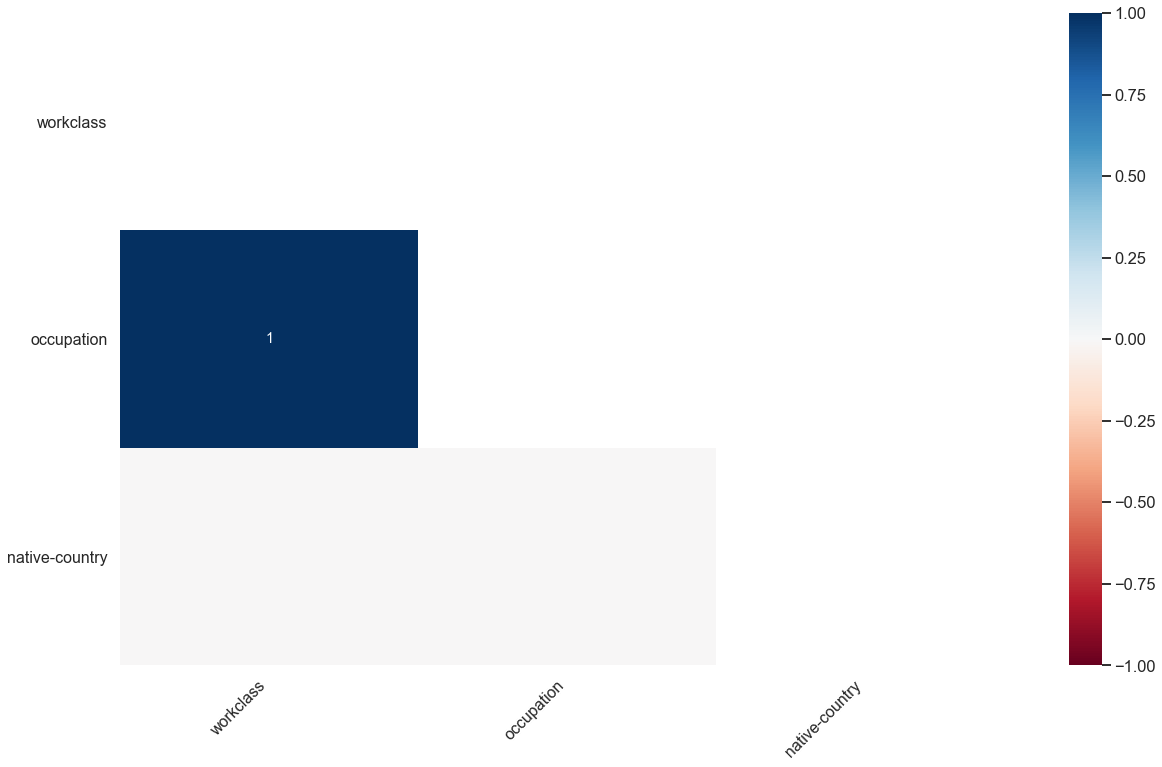

In [638]:
msno.heatmap(adult_data)

missingness of occupation and workclass is highly correlated

The missing values should be treated before we go for further analysis. to treat the missing values of categorical data set they can be imputed with the mode value.  or listwise deletion can be done so that the rows containing any missing values will be deleted. this can be done by drop.na() code.

# Treating missing data 


fill missing values with mode of each caegorical variable 

In [15]:

adult_data.apply(lambda x: x.fillna(x.value_counts().index[0], inplace=True))


age               None
workclass         None
fnlwgt            None
education         None
education-num     None
marital-status    None
occupation        None
relationship      None
race              None
sex               None
capital-gain      None
capital-loss      None
hours-per-week    None
native-country    None
>50K, <=50K       None
dtype: object

In [16]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  >50K, <=50K     32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


The missing data has been replaced by the mode value

# Univariate Analysis 

### Count plot of Native- Country 

<AxesSubplot:xlabel='native-country', ylabel='count'>

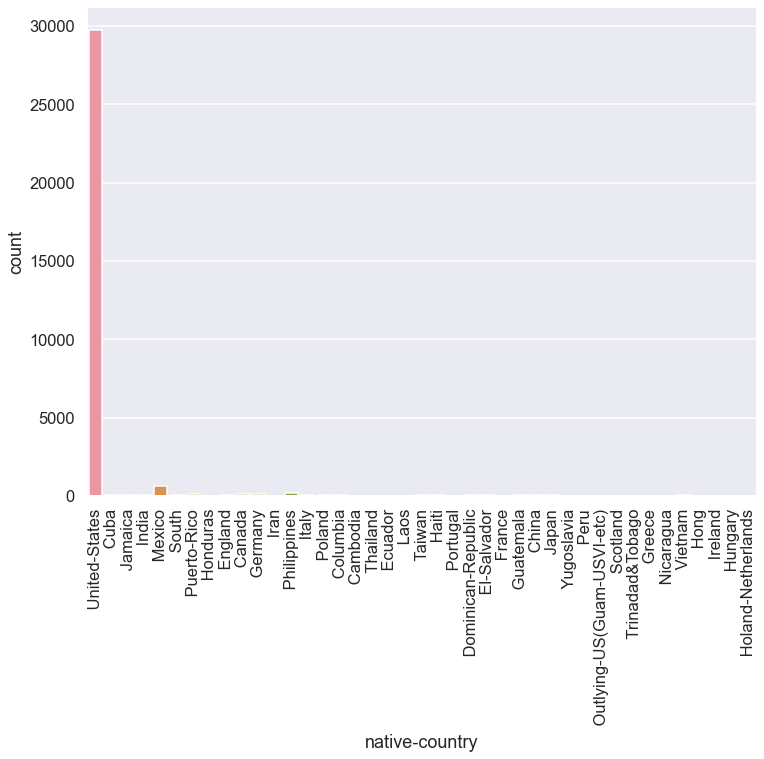

In [641]:
plt.figure( figsize=(12,9))

ax= sns.countplot(data=adult_data,x="native-country")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax
#plt.bar(data=adult_data, x="native-country", height="count")

A majority of the observations are from United states. the second highest number of respondents come from mexico.

### Education num value counts 

In [642]:
print(adult_data["education-num"].dtype)
print(adult_data["education-num"].unique())

int64
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Here it can be seen that even though education_num data type is given as a quantitative variable when you check unique values you can see that only some distinct numerical categories are there. therefore we can assume that education-num represents some kind of ranking method given for level of highest eductation for a particular person 


### Countplot of Education Level

AxesSubplot(0.125,0.125;0.775x0.755)


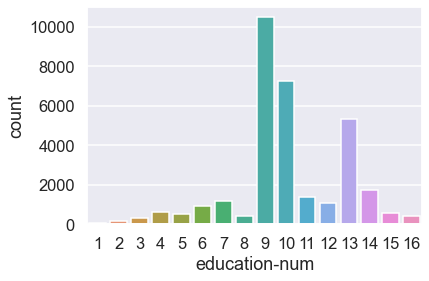

In [643]:
print(sns.countplot(data=adult_data,x="education-num"));



The highest level of education achieved belogs to the category 9  . secondly to the category 10  and 3rdly to the category 13 

### Histogram of Age 

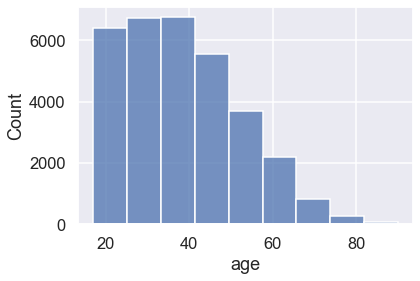

In [644]:
sns.histplot(data=adult_data, x="age", bins=9);

The above histogram takes a left skewed shape. A majority of the observations falls between 30-40 age groups 

### Skewness and kurtosis of age 

In [645]:
print("skewness: ", skew(adult_data["age"], bias=False))
print("kurtosis: ", kurtosis(adult_data["age"], bias=False))

skewness:  0.5576631514973125
kurtosis:  -0.16984978541788687


The age distribution is moderately skewed to the right and is playkurtic

### Box plot of Age 

<AxesSubplot:>

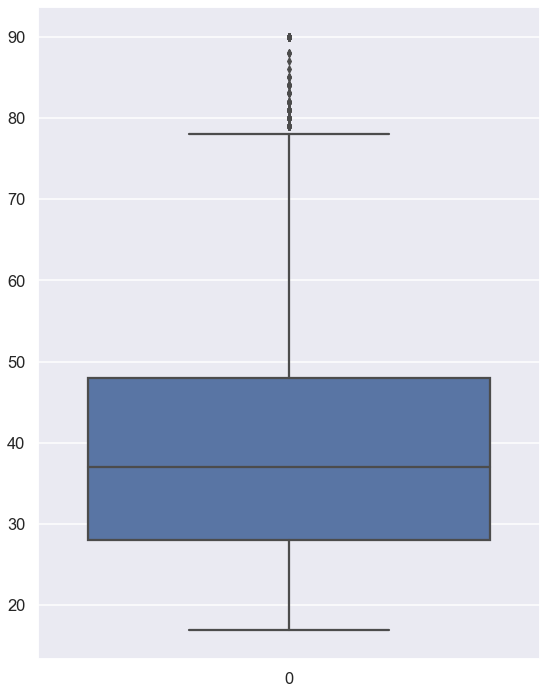

In [657]:
plt.figure( figsize=(9,12))
sns.boxplot(data=adult_data["age"] )

The above boxplot of age shows that it has few outliers. to exactly find the outliers the following code can be done. generally the values which lie away from Q3 + 1.5*IQR and Q1- 1.5*IQR are considerd as outliers 

In [658]:
#first Quartile
q1=adult_data["age"].quantile(0.25)
#third Quartile
q3=adult_data["age"].quantile(0.75)
print ("q1= ", q1,", q3 =",q3)
#calculating the Inter Quartile Range
IQR= q3-q1
print(IQR)
count=0
#find the outliers of the adul data set 
for n in adult_data["age"]:
    if n> (q3+IQR*1.5):
        print("outlier = ", n)
        count+=1
    elif n<(q1-IQR*1.5):
        print("outlier = ", n)
        count+=1
    else: 
        continue
print("Total number of outliers: ", count)

q1=  28.0 , q3 = 48.0
20.0
outlier =  79
outlier =  90
outlier =  80
outlier =  81
outlier =  90
outlier =  88
outlier =  90
outlier =  90
outlier =  80
outlier =  90
outlier =  81
outlier =  82
outlier =  79
outlier =  81
outlier =  80
outlier =  83
outlier =  90
outlier =  90
outlier =  79
outlier =  81
outlier =  90
outlier =  80
outlier =  90
outlier =  90
outlier =  79
outlier =  79
outlier =  84
outlier =  90
outlier =  80
outlier =  90
outlier =  81
outlier =  83
outlier =  84
outlier =  81
outlier =  79
outlier =  85
outlier =  82
outlier =  79
outlier =  80
outlier =  90
outlier =  90
outlier =  90
outlier =  84
outlier =  80
outlier =  90
outlier =  90
outlier =  79
outlier =  84
outlier =  90
outlier =  79
outlier =  90
outlier =  90
outlier =  90
outlier =  82
outlier =  81
outlier =  90
outlier =  84
outlier =  79
outlier =  81
outlier =  82
outlier =  81
outlier =  80
outlier =  90
outlier =  80
outlier =  84
outlier =  82
outlier =  79
outlier =  90
outlier =  84
outlier

The ages between 79 - 90 are considered as outliers. There are 142 outliers for age variable 

### Count plot of Workclass


AxesSubplot(0.125,0.125;0.775x0.755)
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


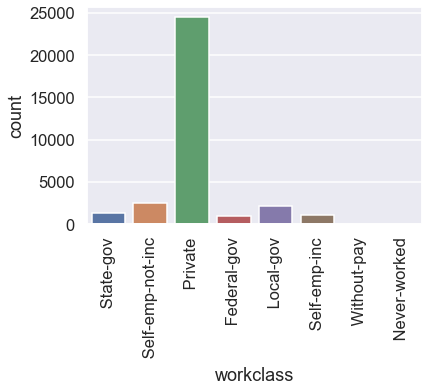

In [659]:
ax=sns.countplot(data=adult_data,x="workclass")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print(ax)
print(adult_data["workclass"].value_counts())

A majority of observations work in the private firm which is arount 24509 people. The people who have never worked and worked without pay is very low compared to those who get some kindof income. 

### Countplot of education 

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64


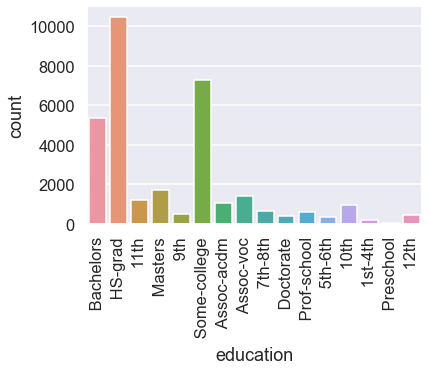

In [660]:
ax=sns.countplot(adult_data["education"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print(ax)
print(adult_data["education"].value_counts())

A majority of respondents belong to the High school graduate class and 2nd largest category belongs to some college cateogory

### histogram of fnlwgt 


<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

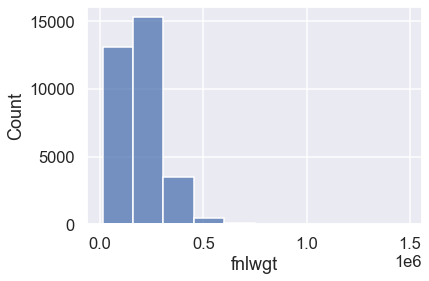

In [661]:
sns.histplot(adult_data["fnlwgt"], bins=10)

fnlwgt has a right skewd distribution

### Count plot of Marital status 


In [662]:
adult_data["marital-status"].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

<AxesSubplot:xlabel='marital-status', ylabel='count'>

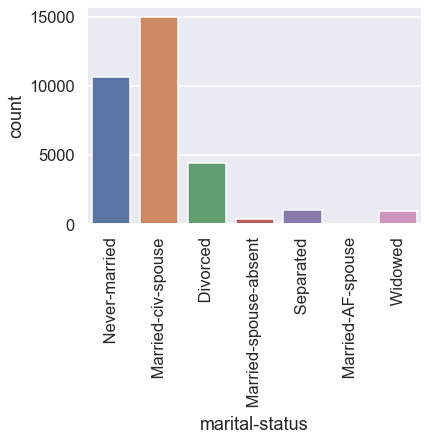

In [663]:
ax= sns.countplot(data=adult_data,x="marital-status")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax

The highest number of respondents belong to the Maried-civ-spouse category and the seconf highest number of respondents belong to the never married category 

### countplot on relationship

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


<AxesSubplot:xlabel='relationship', ylabel='count'>

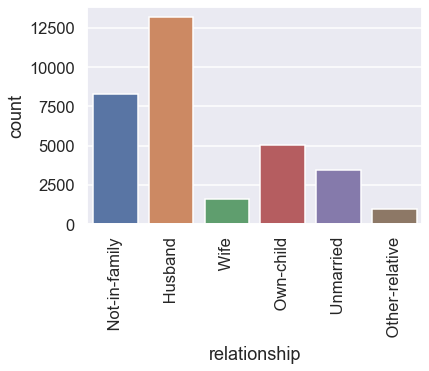

In [664]:
print(adult_data["relationship"].value_counts())
ax= sns.countplot(data=adult_data,x="relationship")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax

The above countplot shows that a majority of the individuals belong to the Husband category. 

### countplot on race 

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


<AxesSubplot:xlabel='race', ylabel='count'>

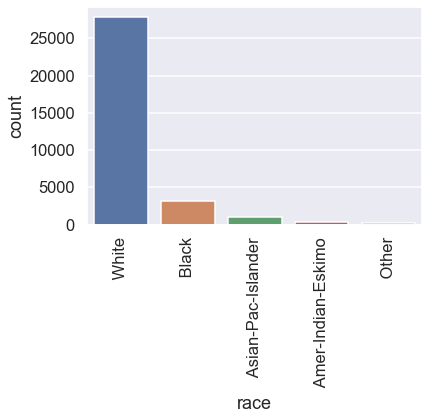

In [665]:
print(adult_data["race"].value_counts())
ax= sns.countplot(data=adult_data,x="race")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax

A majority of the respondents belong to the "White category" and the second largest number of respondents belong to the "black race "

### pie chart of race

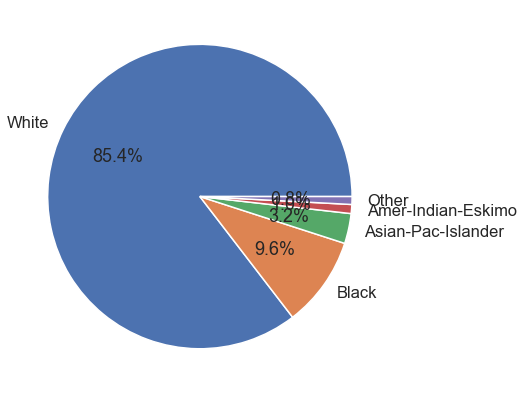

In [666]:
x= ["White","Black","Asian-Pac-Islander","Amer-Indian-Eskimo","Other"]
count=[27795,3122,1038,311,271]
plt.figure(figsize=(7,7))
plt.pie(count, labels=x, autopct='%1.1f%%')
plt.show()

Around 85% of the people belong to white race. Therefore a majority of the responses come from "white race". only 0.8% of the repondents belong to other category 

### distribution of  sex

In [667]:
print(adult_data["sex"].value_counts())

 Male      21775
 Female    10762
Name: sex, dtype: int64


majority of the respondents are males while the others are females 

### pie chart of sex


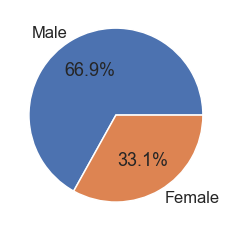

In [668]:
x= ["Male", "Female"]
count=[21775,10762]
plt.pie(count, labels=x, autopct='%1.1f%%')
plt.show()

66.9% of the observations are males while 33.1% belong to female category 

### Histogram of capital gain 

skewness:  11.949402833551462
kurtosis:  154.6829543193813


<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

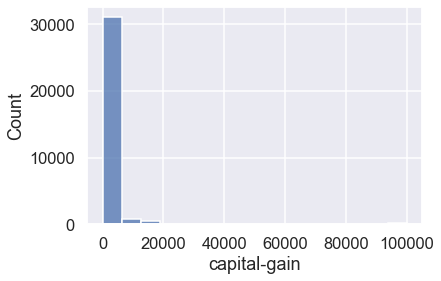

In [681]:
print("skewness: ", skew(adult_data["capital-gain"], bias=False))
print("kurtosis: ", kurtosis(adult_data["capital-gain"], bias=False))
sns.histplot(data=adult_data,x="capital-gain")


The histogram is a highly right skewed plot with high kurtosis (leptokurtic). a majority of capital gains  belong to the 0 

### boxplot of capital-gain

<AxesSubplot:xlabel='capital-gain'>

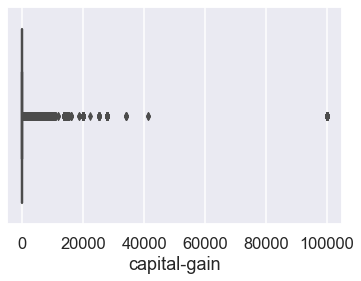

In [671]:
sns.boxplot(data=adult_data,x="capital-gain")


The boxplot depict that there are some extreme outlier values (such as approximately 100,000 capital-gain ) can be seen. here the boxplot is not so visible. therefore we should check more on this. 


### checking outliers in the capital-gain 

In [672]:
#first Quartile
q1=adult_data["capital-gain"].quantile(0.25)
#third Quartile
q3=adult_data["capital-gain"].quantile(0.75)
print ("q1= ", q1,", q3 =",q3)
#calculating the Inter Quartile Range
IQR= q3-q1
print(IQR)
count=0
#find the outliers of the adul data set 
for n in adult_data["capital-gain"]:
    if n> (q3+IQR*1.5):
        print("outlier = ", n)
        count+=1
    elif n<(q1-IQR*1.5):
        print("outlier = ", n)
        count+=1
    else: 
        continue
print("Total number of outliers: ", count)

q1=  0.0 , q3 = 0.0
0.0
outlier =  2174
outlier =  14084
outlier =  5178
outlier =  5013
outlier =  2407
outlier =  14344
outlier =  15024
outlier =  7688
outlier =  34095
outlier =  4064
outlier =  4386
outlier =  14084
outlier =  7298
outlier =  7298
outlier =  15024
outlier =  1409
outlier =  3674
outlier =  4064
outlier =  1055
outlier =  2407
outlier =  7298
outlier =  7298
outlier =  5178
outlier =  15024
outlier =  3464
outlier =  7688
outlier =  4386
outlier =  7298
outlier =  2050
outlier =  7298
outlier =  7298
outlier =  7688
outlier =  15024
outlier =  2176
outlier =  2174
outlier =  594
outlier =  594
outlier =  15024
outlier =  15024
outlier =  7688
outlier =  20051
outlier =  5013
outlier =  7688
outlier =  2174
outlier =  6849
outlier =  1055
outlier =  15024
outlier =  15024
outlier =  15024
outlier =  5178
outlier =  4101
outlier =  1111
outlier =  8614
outlier =  3411
outlier =  2597
outlier =  25236
outlier =  4386
outlier =  4650
outlier =  7298
outlier =  9386
out

there are about 2712 outliers in capital gain variable

### summarising the capital-gain variable 

In [673]:
adult_data["capital-gain"].describe()

count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

It can be see that q1=q2=q3 = 0. this is why the boxplot was not visible in our previous interpretation.This implies that more that 50% of the data points under this variable has got 0 values. eventhough a majority of the points have zeros the mean and standard deviations are very high. this is because of the outliers in the above variable. the maximum capital gain is 99,999.  

### summarising capital-loss variable

In [674]:
adult_data["capital-loss"].describe()

count    32537.000000
mean        87.368227
std        403.101833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

It can be see that q1=q2=q3 = 0. This implies that more that 50% of the data points under this variable has got 0 values. eventhough a majority of the points have zeros the mean and standard deviations are comparatively higher. this is because of the outliers in the above variable. the maximum capital loss is 4356.00

### histogram of capital loss 

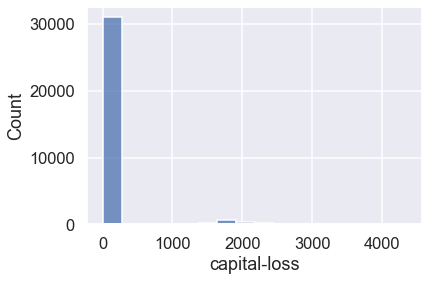

In [676]:
sns.histplot(data=adult_data,x="capital-loss");

from the above histogram it can be seen almost all the individuals has a capital loss = 0. some outliers can be seen within the range of 1500-2500

### outlier checking for capital loss 

In [682]:
#first Quartile
q1=adult_data["capital-loss"].quantile(0.25)
#third Quartile
q3=adult_data["capital-loss"].quantile(0.75)
print ("q1= ", q1,", q3 =",q3)
#calculating the Inter Quartile Range
IQR= q3-q1
print(IQR)
count=0
#find the outliers of the adul data set 
for n in adult_data["capital-loss"]:
    if n> (q3+IQR*1.5):
        print("outlier = ", n)
        count+=1
    elif n<(q1-IQR*1.5):
        print("outlier = ", n)
        count+=1
    else: 
        continue
print("Total number of outliers: ", count)

q1=  0.0 , q3 = 0.0
0.0
outlier =  2042
outlier =  1408
outlier =  1902
outlier =  1573
outlier =  1902
outlier =  1887
outlier =  1719
outlier =  1762
outlier =  1564
outlier =  2179
outlier =  1816
outlier =  1980
outlier =  1977
outlier =  1876
outlier =  1340
outlier =  2206
outlier =  1741
outlier =  1977
outlier =  1485
outlier =  1887
outlier =  1564
outlier =  2339
outlier =  2415
outlier =  2179
outlier =  1977
outlier =  1887
outlier =  1408
outlier =  1980
outlier =  1977
outlier =  1380
outlier =  1977
outlier =  1887
outlier =  1902
outlier =  1762
outlier =  1721
outlier =  1902
outlier =  1380
outlier =  2051
outlier =  2377
outlier =  1669
outlier =  2352
outlier =  1902
outlier =  1721
outlier =  1672
outlier =  653
outlier =  2415
outlier =  2415
outlier =  1977
outlier =  2392
outlier =  1504
outlier =  1902
outlier =  1719
outlier =  2001
outlier =  1902
outlier =  1902
outlier =  1977
outlier =  1902
outlier =  1902
outlier =  1590
outlier =  1977
outlier =  1651
o

There are about 1519 outliers for this variable. that falls approximately  within the range of 800-2500

### summarising hours-per-week

In [683]:
adult_data["hours-per-week"].describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

 This variable gives the hours an individual has reported to work per week. on average people work approximately 40 hours per week.  maximum working hours is 99 hours per week while minimum working hour is 1hour per week


### histogram of hours-per-week

skewness:  0.22875887785250423
kurtosis:  2.917718168965954


<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

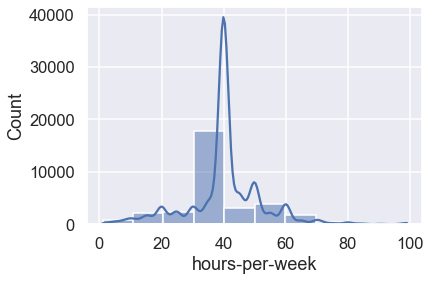

In [684]:

print("skewness: ", skew(adult_data["hours-per-week"], bias=False))
print("kurtosis: ", kurtosis(adult_data["hours-per-week"], bias=False))
sns.histplot(data=adult_data,x="hours-per-week", bins=10, kde=True)


The distribution looks somewhat simmetric. a majority of values falls between 30-40 category

### Skewness and kurtosis of hours-per- week

In [685]:
print("skewness: ", skew(adult_data["hours-per-week"], bias=False))
print("kurtosis: ", kurtosis(adult_data["hours-per-week"], bias=False))

skewness:  0.22875887785250423
kurtosis:  2.917718168965954


 the distribution is approxiamtely symmetric and almost leptokurtic

### box plot of hours per week

<AxesSubplot:xlabel='hours-per-week'>

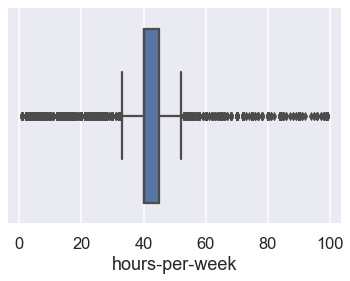

In [686]:
sns.boxplot(data=adult_data,x="hours-per-week")


It can be seen that more that 50% of the data lie between 40-45%  range. with some extreame outliers which lie away from both  tails of the box plot


### checking for outliers in hours-per-week

In [687]:
#first Quartile
q1=adult_data["hours-per-week"].quantile(0.25)
#third Quartile
q3=adult_data["hours-per-week"].quantile(0.75)
print ("q1= ", q1,", q3 =",q3)
#calculating the Inter Quartile Range
IQR= q3-q1
print(IQR)
count=0
#find the outliers of the adul data set 
for n in adult_data["hours-per-week"]:
    if n> (q3+IQR*1.5):
        #print("outlier = ", n)
        count+=1
    elif n<(q1-IQR*1.5):
        #print("outlier = ", n)
        count+=1
    else: 
        continue
print("Total number of outliers: ", count)

q1=  40.0 , q3 = 45.0
5.0
Total number of outliers:  9002


there are 9002 outliers belonging to hour-per-week variable

### Count plot of income

 <=50K    24698
 >50K      7839
Name: income, dtype: int64


<AxesSubplot:xlabel='income', ylabel='count'>

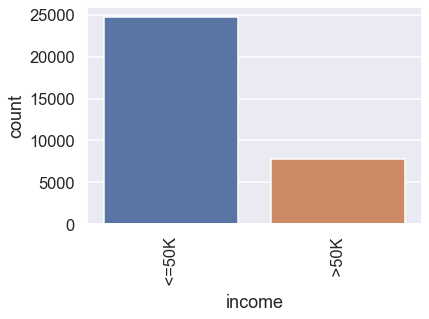

In [688]:
# rename column name as income 
adult_data.rename(columns = {'>50K, <=50K':'income'}, inplace = True)
print(adult_data["income"].value_counts())
ax= sns.countplot(data=adult_data,x="income")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax

A majority of respondents have income level lower than 50k. that is around 24698

### count plot of occupation

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


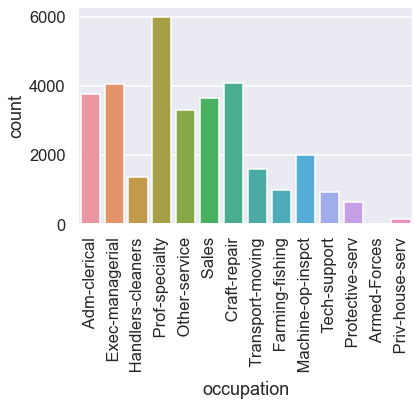

In [689]:
print(adult_data["occupation"].value_counts())
ax=sns.countplot(data=adult_data, x="occupation")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print(ax)



a highest observations belong to the prof-speciality category.  while a very small amount belong to armed forces category. Almost similar number of observations come from both  Exec-managerial,Craft-repair categories. 

# Bi variate Analysis

### check how age changes with income level 

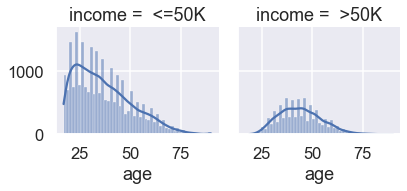

In [690]:
sns.FacetGrid(adult_data,col='income').map(sns.histplot, "age", kde=True) 
plt.show()


The age distribution of people who gain an income less than 50k is right skewed while the distribution of people who gain an income of more than 50k is approximately normal. 


<AxesSubplot:xlabel='age', ylabel='Count'>

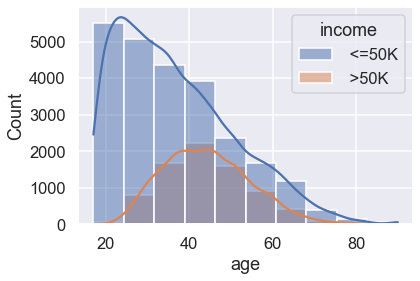

In [691]:
sns.histplot(data=adult_data, x="age", hue="income", alpha=0.5, bins=10, kde=True)

Here it can be seen that the people with income level less than 50k has a right skewed distribution while the people with income level greater than 50k has approximately normal
a majority of the observations gain an income of less than 50k. and in this  category approximately a majority falls inthe 20-30 category. out of the people who get an income higher than 50k a majority falls 40 age category 

### income vs sex bar plot 

<AxesSubplot:xlabel='sex'>

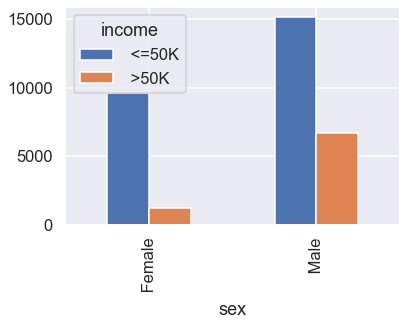

In [694]:
pd.crosstab(adult_data["sex"],adult_data["income"]).plot.bar()

In both male and female catogries it can be seen that the number of people who earn an income less than 50k is higher than that of the people who earn an income more than 50k.

### draw a proportionate cross tab to display income vs. sex

In [695]:

cross_tab = pd.crosstab(index=adult_data['sex'],
                             columns=adult_data['income'])
print(cross_tab)

cross_tab_prop = pd.crosstab(index=adult_data['sex'],
                             columns=adult_data['income'], normalize="index")
cross_tab_prop

income    <=50K   >50K
sex                   
 Female    9583   1179
 Male     15115   6660


income,<=50K,>50K
sex,,
Female,0.890448,0.109552
Male,0.694145,0.305855


### 100% stacked bar graph for sex vs. income

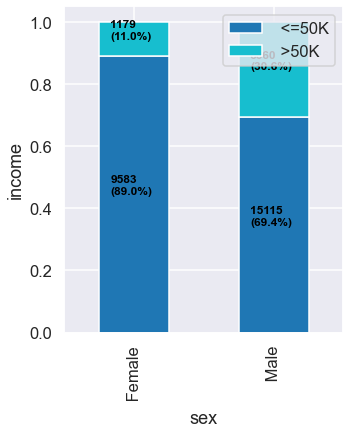

In [696]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 6))

plt.legend(loc="best", ncol=1)
plt.xlabel("sex")
plt.ylabel("income")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n-0.17 ,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")



plt.show()

from the above staked bar plot it can be seen that out of females a majority of females earn an income less than 50k  (which is around 89% approximately ) while only about 11% of them earn an income of more than 50k. when the percentage of males who earn more than 50k is considered it can be seen that this percentage is higher than that of females. which is approximately 31%. hence we can see than the percentage of males who earn more than 50k is comparatively higher than that of percentage of females who earn more than 50k


### education vs. education-num

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


<AxesSubplot:xlabel='education-num', ylabel='education'>

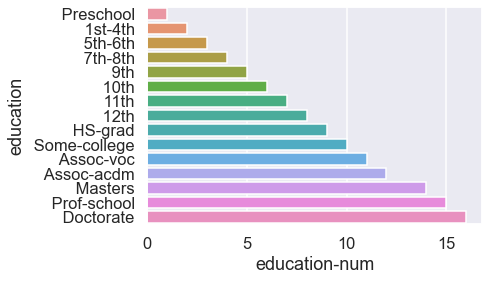

In [697]:
print(adult_data["education"].unique())
sns.barplot(data=adult_data,x="education-num", y="education", order=[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Some-college',' Assoc-voc',' Assoc-acdm',' Masters',' Prof-school',' Doctorate'])

The above plot shows how the educations are ranked based on eduction num where preschool is given the smallest rank =1 to doctorate given the largest rank of 16

### income vs. education

In [698]:
cross_tab = pd.crosstab(index=adult_data['education'],
                             columns=adult_data['income'])
print(cross_tab)

cross_tab_prop = pd.crosstab(index=adult_data['education'],
                             columns=adult_data['income'], normalize="index")
cross_tab_prop



income          <=50K   >50K
education                   
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          160      6
 5th-6th          316     16
 7th-8th          605     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3132   2221
 Doctorate        107    306
 HS-grad         8820   1674
 Masters          763    959
 Preschool         50      0
 Prof-school      153    423
 Some-college    5896   1386


income,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.963855,0.036145
5th-6th,0.951807,0.048193
7th-8th,0.937984,0.062016
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


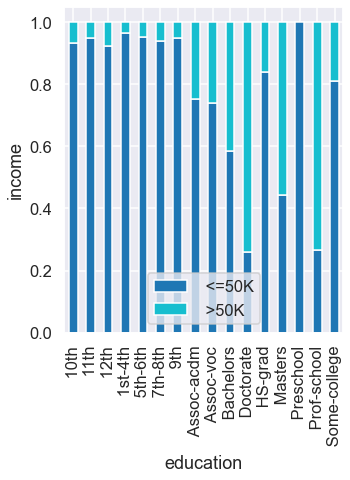

In [699]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 6))

plt.legend(loc="best", ncol=1)
plt.xlabel("education")
plt.ylabel("income")




plt.show()

from the above graph and cross tabs it can be seen that more than 90% of students who are in (10th, 11th , 12th, 1st-4th,5th-6th,7-8th,9th,preschool) get n income of less than 50k. therefore under these categories the percentage of students who get an income which is less than 50k is way higher than the percentage of students who gain an income grater than 50%. therefore all these seperate groups can be further categorized in to one category as "students", in Doctorate and Pro-school categories it can be seen that the percentage of the ones who get an income more than 50k is higher than those who get an income less than 50k. and this percentage is approximately 74%. A clear insight can be gained if we plot against the education-num or rank 

In [700]:
cross_tab = pd.crosstab(index=adult_data['education-num'],
                             columns=adult_data['income'])
print(cross_tab)

cross_tab_prop = pd.crosstab(index=adult_data['education-num'],
                             columns=adult_data['income'], normalize="index")
cross_tab_prop



income          <=50K   >50K
education-num               
1                  50      0
2                 160      6
3                 316     16
4                 605     40
5                 487     27
6                 871     62
7                1115     60
8                 400     33
9                8820   1674
10               5896   1386
11               1021    361
12                802    265
13               3132   2221
14                763    959
15                153    423
16                107    306


income,<=50K,>50K
education-num,,
1,1.000000,0.000000
2,0.963855,0.036145
3,0.951807,0.048193
4,0.937984,0.062016
5,0.947471,0.052529
6,0.933548,0.066452
7,0.948936,0.051064
8,0.923788,0.076212
9,0.840480,0.159520


from the above table it can be seen that education level 1-8 (i.e from preschool - 12th grade) category the percentage of those who get an income less than 50k is way higher (more than 90%) than the percentage of those who get an income greater than 50k. also in eductation level 9 & 10 (i.e HS-grad and some college) category the percentage of those who get an income less than 50k is  higher (between 80-85%) than the percentage of those who get an income greater than 50k. education level 11-12 (i.e assoc-voc & assoc-acdm ) category the percentage of those who get an income less than 50k is  higher (around 73-75%) than the percentage of those who get an income greater than 50k. in education level 13(i.e .bachelors ) category the percentage of those who get an income less than 50k is  slightly higher (around 58%) than the percentage of those who get an income greater than 50k. in education level 14(i.e masters ) category the percentage of those who get an income less than 50k is  slightly less than(around 44%) than the percentage of those who get an income greater than 50k. (in other words the percentage of those who has a masters dergree who gain an income greater than 50k is slighly higher than those who has a master but and income less than 50k). finally it can be seen that in education level 15-16 (i.e prof-schol and doctorate) category the percentage of those who get an income less than 50k is way lower (around 25%) than the percentage of those who get an income greater than 50k. (in other words the percentage of those who has a phd degree & an income greater than 50k is way higher than those who has a phd and an income less than 50k). but the above information it  can be summarized that when the educational level increase the income of a person too drastically increases. futhermore the education levels can be summarised into 6 main categories (based on income level) such that ; 


(from preschool - 12th grade)= students

( HS-grad and some college) =High school student

(assoc-voc & assoc-acdm ) = associate degree holders

(i.e .bachelors ) = bachelors degree holders

(i.e masters ) = post graduate/masters holders

(i.e prof-schol and doctorate) = phd holders 

the above can be visualized by the following graph 


### 100% stack bar graph education num vs. income

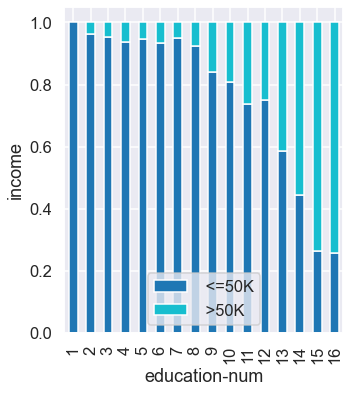

In [701]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(5, 6))

plt.legend(loc="best", ncol=1)
plt.xlabel("education-num")
plt.ylabel("income")




plt.show()

#### It was earlier seen that the education can be categorized into 6 main categories based on income. there for these catogorization can be done seperately

In [702]:
adult_data.education=adult_data.education.replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],"student")
adult_data.education=adult_data.education.replace([' HS-grad',' Some-college'],"high-school student")
adult_data.education=adult_data.education.replace([' Assoc-voc',' Assoc-acdm'],"associate degree")
adult_data.education=adult_data.education.replace([' Prof-school',' Doctorate'],"phd")

Checking the new categories

In [703]:
adult_data.education.unique()

array([' Bachelors', 'high-school student', 'student', ' Masters',
       'associate degree', 'phd'], dtype=object)

It can be seen the 16 categories have reduced to 6  categories

### count plot for new education category (univariate)

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


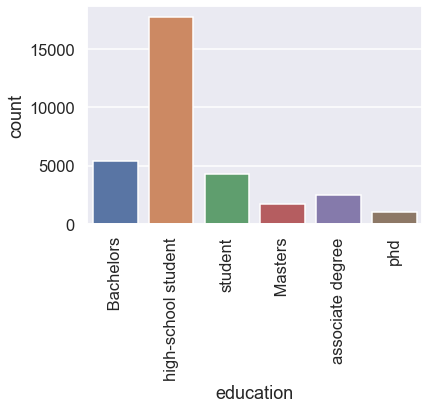

In [704]:
ax=sns.countplot(adult_data.education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

a majority of observations fall in to the high school student category. while the second highest category belongs to bachelors. the phd category has the smallest number of respondents

### income vs. marital-status 

In [706]:
cross_tab = pd.crosstab(index=adult_data['marital-status'],
                             columns=adult_data['income'])
print(cross_tab)

cross_tab_prop = pd.crosstab(index=adult_data['marital-status'],
                             columns=adult_data['income'], normalize="index")
cross_tab_prop


income                   <=50K   >50K
marital-status                       
 Divorced                 3978    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8280   6690
 Married-spouse-absent     384     34
 Never-married           10176    491
 Separated                 959     66
 Widowed                   908     85


income,<=50K,>50K
marital-status,,
Divorced,0.895744,0.104256
Married-AF-spouse,0.565217,0.434783
Married-civ-spouse,0.553106,0.446894
Married-spouse-absent,0.918660,0.081340
Never-married,0.953970,0.046030
Separated,0.935610,0.064390
Widowed,0.914401,0.085599


<AxesSubplot:xlabel='marital-status'>

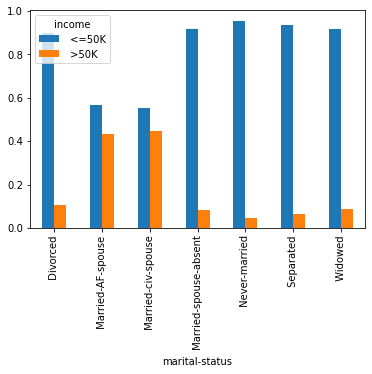

In [557]:
cross_tab_prop.plot.bar()

The married-AF-Spouse , Married-cv-spouse categories income level is quite good comparing to other categories. since in these two categories the percentage of people who gain an high income (>50k) is comparatively higher than other categories. a majority of respondents who belong to the other categories get an income less than 50k  

### capital gain vs. capital loss

<AxesSubplot:xlabel='capital-loss', ylabel='capital-gain'>

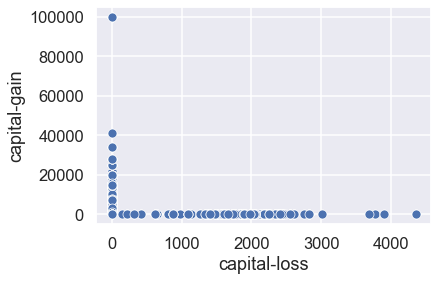

In [712]:
sns.scatterplot(data=adult_data, x="capital-loss", y="capital-gain")

There is not clear linear relationship between the two variables. when capital gain is 0 the capital loss ranges between 0-40,000 with an outlier value of 10,000. when capitan gain is 0 capital loss ranges between 0-4500

### income vs. race

In [713]:
cross_tab = pd.crosstab(index=adult_data['race'],
                             columns=adult_data['income'])
print(cross_tab)

cross_tab_prop = pd.crosstab(index=adult_data['race'],
                             columns=adult_data['income'], normalize="index")
cross_tab_prop

income                <=50K   >50K
race                              
 Amer-Indian-Eskimo     275     36
 Asian-Pac-Islander     762    276
 Black                 2735    387
 Other                  246     25
 White                20680   7115


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734104,0.265896
Black,0.876041,0.123959
Other,0.907749,0.092251
White,0.744019,0.255981


<AxesSubplot:xlabel='race'>

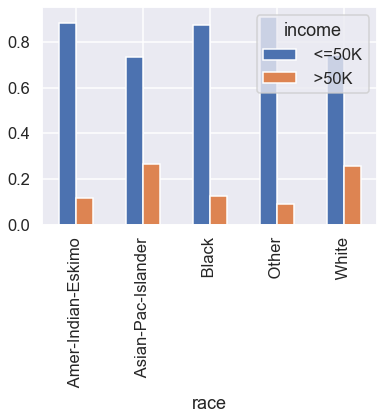

In [714]:
cross_tab_prop.plot.bar()

Here it can be seen that when compared with other races percentage of getting a income greater than 50k is a bit higher for white and Asian-Pac-Islander races

### income vs. hours per week

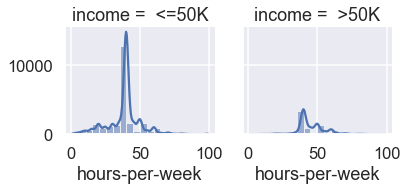

In [715]:
sns.FacetGrid(adult_data,col='income').map(sns.histplot, "hours-per-week", kde=True, bins=20) 
plt.show()


the distribution of hours-per-week for income<= 50k is somewhat symmetric, leptokurtic and distribution while the distribution of hours-per-week for income >50k is somewhat symmetric and platykurtic 

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

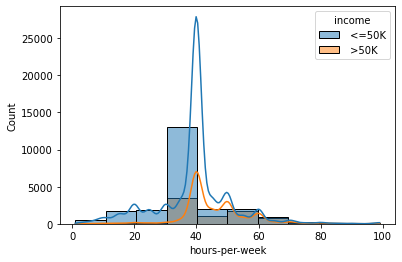

In [372]:
sns.histplot(data=adult_data, x="hours-per-week", hue="income", kde=True, alpha=0.5, bins=10)

for both categories the mode lies in 30-40 category. but the frequency high for the <=50k category

### age vs. capital-gain 

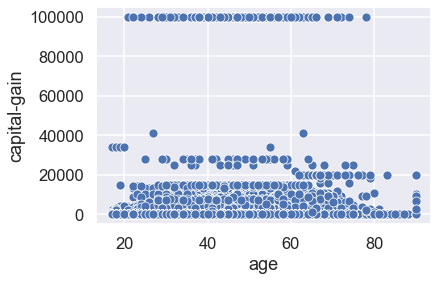

In [720]:
sns.scatterplot(data=adult_data, x="age", y="capital-gain");

The scatter plot doesnt contain a specific trend. but some outlier observations can be found for all age groups. here the capital-gain can be clearly grouped into two groups. high capital gain and low capital gain. but the groups doesnt seem to be affected by the age variable 

### age vs. hours-per-week

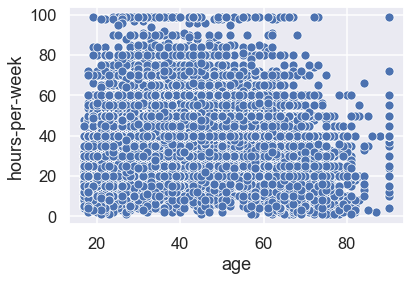

In [721]:
sns.scatterplot(data=adult_data, x="age", y="hours-per-week");


A clear pattern cannot be seen when age is plotted against the hours per week

### income vs. occupation

income               <=50K   >50K
occupation                       
 Adm-clerical         3261    507
 Armed-Forces            8      1
 Craft-repair         3165    929
 Exec-managerial      2097   1968
 Farming-fishing       877    115
 Handlers-cleaners    1283     86
 Machine-op-inspct    1751    249
 Other-service        3154    137
 Priv-house-serv       146      1
 Prof-specialty       3930   2049
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          644    283
 Transport-moving     1277    320
income                 <=50K      >50K
occupation                            
 Adm-clerical       0.865446  0.134554
 Armed-Forces       0.888889  0.111111
 Craft-repair       0.773083  0.226917
 Exec-managerial    0.515867  0.484133
 Farming-fishing    0.884073  0.115927
 Handlers-cleaners  0.937180  0.062820
 Machine-op-inspct  0.875500  0.124500
 Other-service      0.958371  0.041629
 Priv-house-serv    0.993197  0.006803
 Prof-specialty     0.65730

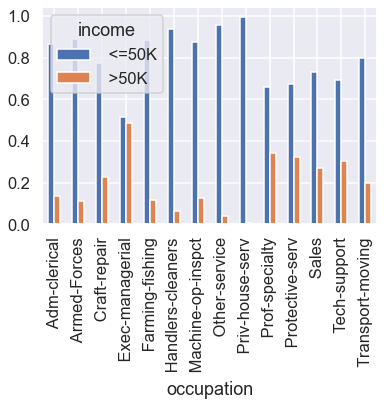

In [722]:
cross_tab = pd.crosstab(index=adult_data['occupation'],
                             columns=adult_data['income'])
print(cross_tab)

cross_tab_prop = pd.crosstab(index=adult_data['occupation'],
                             columns=adult_data['income'], normalize="index")
print(cross_tab_prop)


cross_tab_prop.plot(kind='bar')


plt.show()

it can be seen that 99% of prov-house-serv occupation job category is paid less than 50k. and more than 90% of employees who belong to  Handlers-cleaners & Other-service are paid less than 50k. Exec-managerial is paid well compared to other job categories. 

### Correlation plot

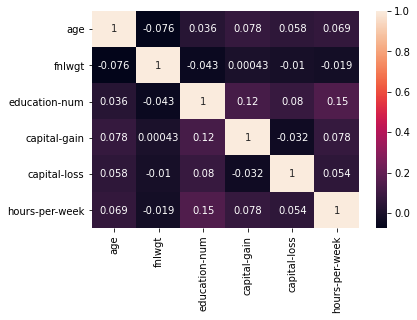

In [20]:

sns.heatmap(adult_data.corr(), annot=True);

None of the correlations are highly significant. but fnlwght has a slight negetive correlation with age,capital-gain, capital-loss and hours-per-week

# Multivariate Analysis 

### Income, age, education

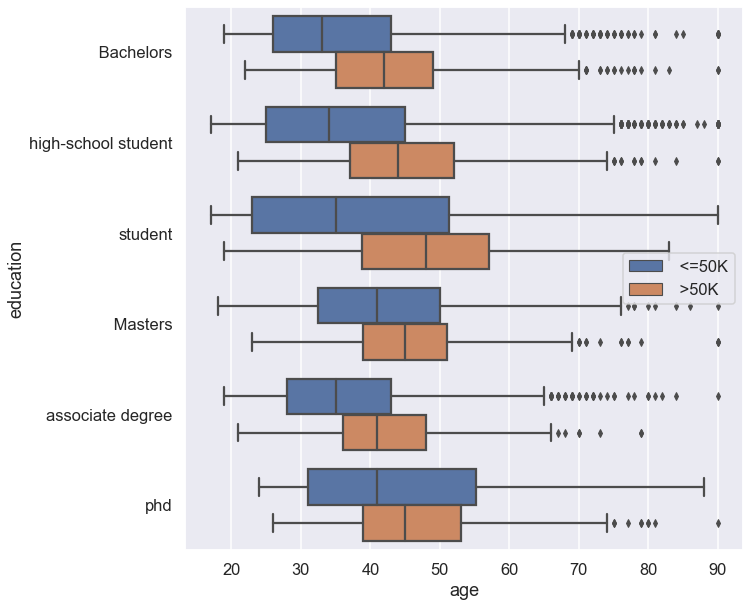

In [723]:
plt.figure(figsize=(10,10))
sns.boxplot(data=adult_data, x="age", y="education", hue="income")
plt.legend(loc="right")
plt.show()


from the above graph it can be seen that for all  education categories the distribution has slightly moved to the right. in otherwords it can be seen that the whatever the education level is  there is a tendancy to get the better income when you are older 

### income, education, capital-gain

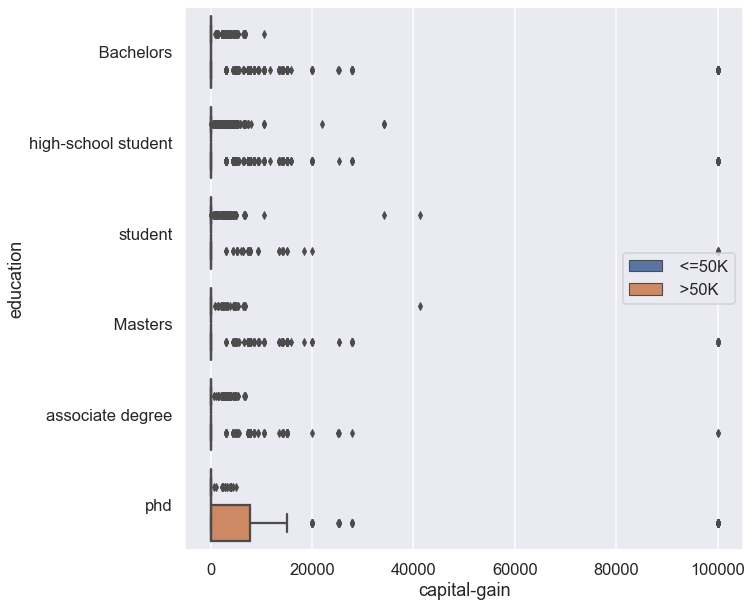

In [724]:
plt.figure(figsize=(10,10))
sns.boxplot(data=adult_data, x="capital-gain", y="education", hue="income")
plt.legend(loc="right")
plt.show()

for phd education level, when the income is greater than 50k, a clear distribution can be seen (i.e a right skewed distribution can be seen). for all the other education backgrounds the the majority of the capital gain values lies in zero except some extream outliers 

### income, education, capital loss

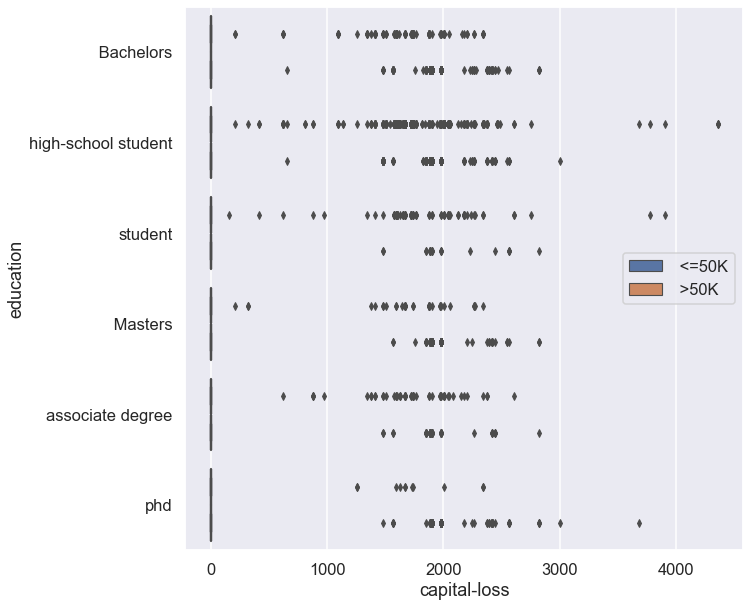

In [725]:
plt.figure(figsize=(10,10))
sns.boxplot(data=adult_data, x="capital-loss", y="education", hue="income")
plt.legend(loc="right")
plt.show()

for all education background the a majority of observations capital loss lies in 0 (i.e. q1=q2=q=3 =0)

### race, income, capital-gain

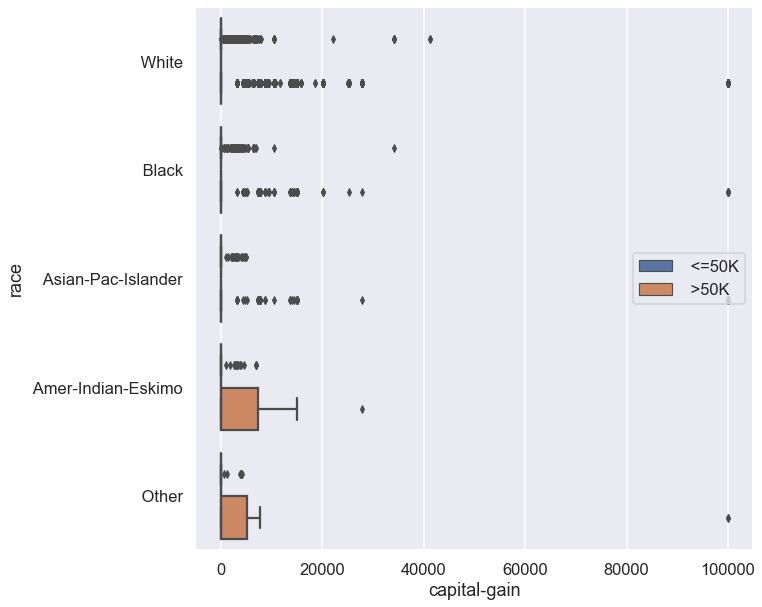

In [726]:
plt.figure(figsize=(10,10))
sns.boxplot(data=adult_data, x="capital-gain", y="race", hue="income")
plt.legend(loc="right")
plt.show()

for amer-indian-Eskimo cateogry and other race category a right skewed distribution can be seen for income>50k. the boxplot of the american indian eskimo race has a longer tail when compared with "other" category. 

### age, sex, income

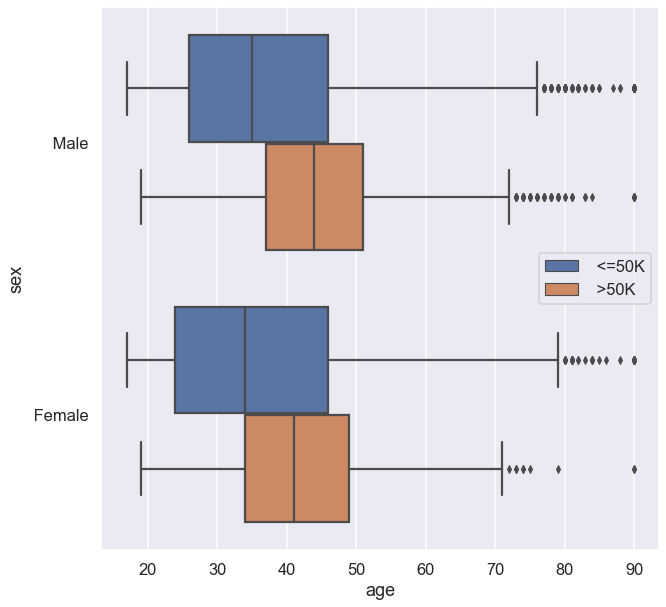

In [731]:
plt.figure(figsize=(10,10))
sns.boxplot(data=adult_data, x="age", y="sex", hue="income")
plt.legend(loc="right")
plt.show()

The age distribution of income levels are approximately similar for males and females